# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_and_study_df = pd.merge(study_results,mouse_metadata,how='left',on='Mouse ID')

# Display the data table for preview
mouse_and_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
mouse_and_study_df['Mouse ID'].nunique()

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#I used Microsoft Bing Copilot to help me figure this out since I was confused how to uniquely identify two columns and couldn't progress further withough completing this part. I then modified it to fit my code. 
grouped_df = mouse_and_study_df.groupby(['Mouse ID','Timepoint'])
# Count the number of rows for each group
count_df = grouped_df.size().reset_index(name="count")
# Filter the groups that have more than one row
duplicate_df = count_df[count_df["count"] > 1]
duplicate_df.head(50)

,Mouse ID,Timepoint,count
586,g989,0,2
587,g989,5,2
588,g989,10,2
589,g989,15,2
590,g989,20,2


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = mouse_and_study_df[mouse_and_study_df['Mouse ID']=='g989']
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_and_study_df[mouse_and_study_df['Mouse ID'] != 'g989']

In [8]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor_vol = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_vol = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_std_dev = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_std_err = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_vol,
    "Median Tumor Volume": median_tumor_vol,
    "Tumor Volume Variance": tumor_volume_variance,
    "Tumor Volume Std. Dev.": tumor_volume_std_dev,
    "Tumor Volume Std. Err.": tumor_volume_std_err
})
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# This link below helped me find more information on the syntax of using group by and the aggregate function
# Using the double bracket makes the title of the dataframe. 
# The brackets in the .agg function to calculate the summary stats table are neccesary as the agg function expects a list or dictionary of aggregate functions
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html
summary_stats_agg_df = clean_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].agg(['mean','median','var','std','sem'])
summary_stats_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

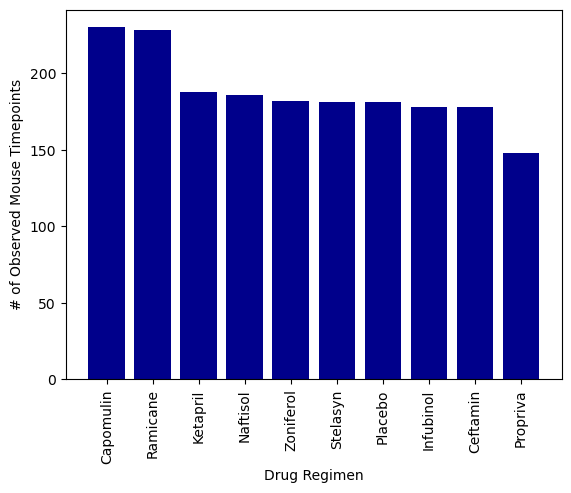

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drugs = clean_df['Drug Regimen'].unique()
x_axis = np.arange(len(drugs))
y_axis = clean_df.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin','Ramicane','Ketapril','Naftisol','Zoniferol','Stelasyn','Placebo','Infubinol','Ceftamin','Propriva'], rotation =90)

plt.bar(x_axis, y_axis,color='darkblue',align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

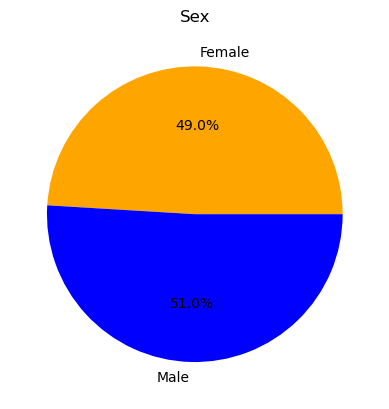

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
labels = ["Female","Male"]
sizes = clean_df.groupby("Sex")["Mouse ID"].count()
colors = ["orange","blue"]

plt.title("Sex")
plt.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_timepoint_df = pd.merge(clean_df, last_timepoint, how="right", on=["Mouse ID", "Timepoint"])

# Show the resulting DataFrame
greatest_timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [46]:
# Put treatments into a list for for loop (and later for plot labels)
# the Xpert learning assistant helped me with this for loop as far as the subset and appending the subset to the empty list.
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = greatest_timepoint_df.loc[greatest_timepoint_df["Drug Regimen"] == treatment, :]
    # add subset 
    tumor_vol_data.append(subset["Tumor Volume (mm3)"])
    # Determine outliers using upper and lower bounds
    # Calculate the lower and upper quartiles using np.quantile
    # the xpert learning assistant helped me add the -1 index as I was receiving an error. Told me that it helped grab the most recently appended subset from the list.
    quartiles = tumor_vol_data[-1].quantile([.25,.5,.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3-q1
    # Calculate the lower and upper bounds using 1.5 * IQR
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    # Print the results for each drug
    print(f"{treatment}'s potential outliers are less than {lower_bound} and greater than {upper_bound}.")


Capomulin's potential outliers are less than 20.70456164999999 and greater than 51.83201549.
Ramicane's potential outliers are less than 17.912664470000003 and greater than 54.30681135.
Infubinol's potential outliers are less than 36.83290494999999 and greater than 82.74144559000001.
Ceftamin's potential outliers are less than 25.355449580000002 and greater than 87.66645829999999.


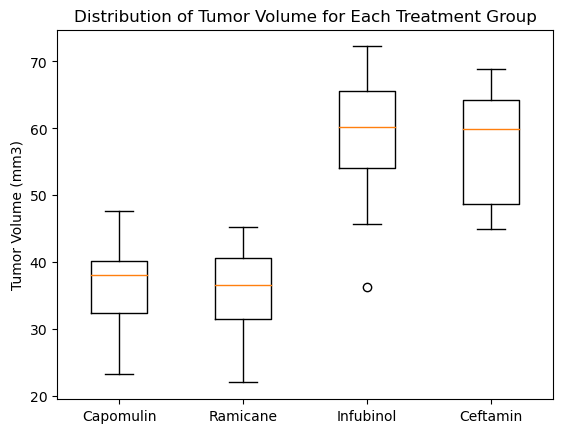

In [48]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a figure and axis for the box plot
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data)
ax.set_xticklabels(treatments)
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title('Distribution of Tumor Volume for Each Treatment Group')
plt.show()

## Line and Scatter Plots

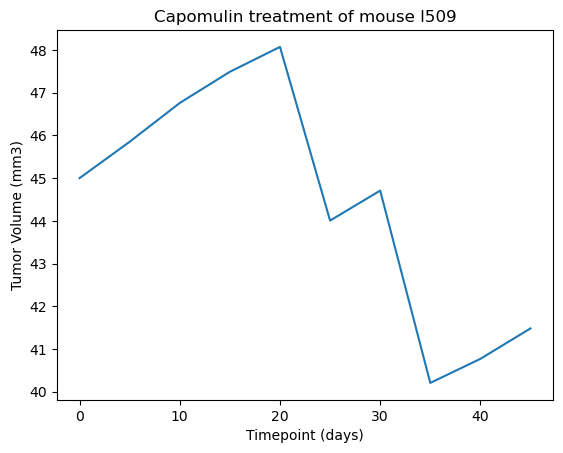

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


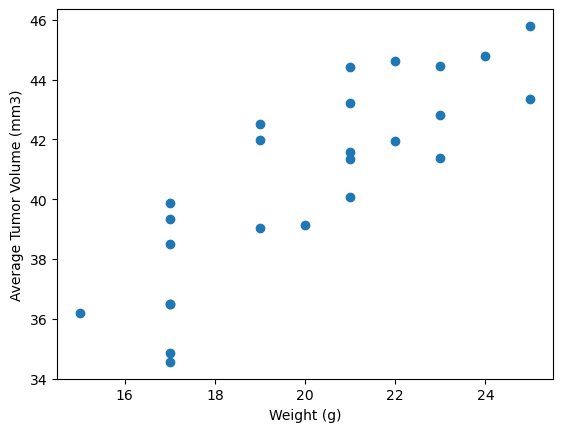

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


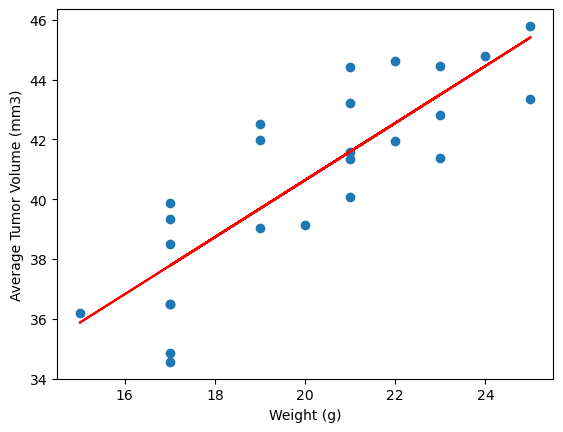

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
